In [1]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import time

import matplotlib.cm as cm
from IPython.display import Image
import git

from rmgpy.molecule import Molecule
from rmgpy.data.base import Database

In [2]:
#Input file
rmg_model_path = '../../../Rh211/'
analysis_path = '../Rh211/results/'

In [3]:
#Git-python: checkout master branch
import git
repo = git.Repo(rmg_model_path)
date = time.localtime(repo.head.commit.committed_date)
git_date = f"{date[0]}_{date[1]}_{date[2]}_{date[3]}{date[4]}"
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")

current_commit = f"{git_date}_{git_sha}_{git_msg}"

current_commit

'2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting'

In [4]:
# #checkout 1 commit back
# repo.git.checkout('HEAD^1')
# sha = str(repo.head.commit)
# msg = str(repo.head.commit.message)
# print(sha,': ', msg)

# #checkout 2 commit back
# repo = git.Repo('/work/westgroup/lee.ting/cantera/ammonia/')
# repo.git.checkout('HEAD^1')
# sha = repo.head.commit
# msg = repo.head.commit.message
# print(sha,': ', msg)

In [5]:
commit_list = []

# read in each filename into dictionary. get a list of the commit folders in this repo
for path in Path(analysis_path).rglob('*.csv'):
    path_str = str(path)
    start_index = path_str.find(analysis_path)
    
    if start_index != -1:
        commit = path_str[(start_index+len(analysis_path)):]
        print(commit)
        if "\n" in commit:
            end_char = commit.index("\n")
        else: 
            end_char = commit.index("/")
        
        commit = commit[:end_char]
        if commit not in commit_list:
            commit_list.append(commit)
        
print(commit_list)   

2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1000.0.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1004.3478260869565.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1008.695652173913.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1009.0909090909091.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1013.0434782608695.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1017.391304347826.csv
2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1021.7391304347826.csv
2021_6_21_1049_e81986_master_Rh211

In [36]:
data_dict = {}

# Read last line from each CSV file to get the outlet concentrations from the PFR
# if "one_commit" is true, only run the master commit 
one_commit = False
if one_commit == True:
    commit_list = [current_commit]
    
for commit in commit_list:
    first_file = True 
    for path in Path(f"../Rh211/results/{current_commit}").rglob('*.csv'):
    #for path in Path(f"../Rh211/results/2021_6_21_1049_e81986_master_Rh211_31rxn_revisedNO/").rglob('*.csv'):
        path_str = str(path)
        if os.stat(path_str).st_size >= 1e6:
            if first_file == True: 
                data = pd.read_csv(path_str)
                aggdata = data.tail(1)
                first_file = False
            else: 
                data = pd.read_csv(path_str)
                aggdata = aggdata.append(data.tail(1))
            data_dict.update({commit:aggdata})
        else:
            print(path_str)

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1000.0.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1004.8896321070234.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1008.695652173913.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1030.4347826086955.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1035.3478260869565.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_tem

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1392.9832775919733.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1404.3478260869565.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1409.5484949832776.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1414.7558528428094.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1421.7391304347825.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_e

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_369.67224080267556.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_373.9130434782609.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_374.0267558528428.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_378.2608695652174.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_378.38127090301003.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_ener

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_495.6521739130435.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_500.0.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.3478260869565.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.505016722408.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.66220735785953.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_50

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_678.2608695652174.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_678.551839464883.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_683.1973244147157.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_686.9565217391305.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_695.9565217391305.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_886.9565217391304.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_891.3043478260869.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_896.1103678929766.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_900.0.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_900.4615384615385.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_90

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1127.3578595317726.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1131.71237458194.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1139.1304347826085.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1140.4214046822744.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1147.8260869565217.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_ene

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1501.8461538461538.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1505.2742474916388.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1508.695652173913.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1510.5551839464883.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_1517.391304347826.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_ene

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_374.0267558528428.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_378.2608695652174.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_378.38127090301003.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_382.6086956521739.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_386.95652173913044.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_ener

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_500.0.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.3478260869565.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.505016722408.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_504.66220735785953.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_508.695652173913.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_509

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_678.2608695652174.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_678.551839464883.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_683.1973244147157.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_686.9565217391305.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_695.9565217391305.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_

../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_865.2173913043478.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_865.6521739130435.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_869.5652173913044.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_870.0033444816054.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy_off_temp_873.9130434782609.csv
../Rh211/results/2021_6_27_1621_28b6a5_revisedA_Rh211_from_Pt111_20rxn_data_fitting/IdealGasReactor/results/Spinning_basket_area_0.01_energy

# For our selectivity definitions
Two types of selectivity. Overall, and instantaneous. 

For overall selectivity, it depends on the total amounts exiting the packed bed. Probably what is measured experimentally from the PBR experiment (by measuring concentrations leaving the bed).

$$ selectivity(N2) = \frac{2 * moles_{N2}}{molesfed_{NH3} - moles_{NH3}} * 100\%$$
The 2 is because we are preserving (and counting) atoms of Nitrogen. Selectivity is "What percentage of N atoms (from consuming ammonia) ended up as N2?
"

$$ selectivity(N2O) = \frac{2 * moles_{N2O}}{molesfed_{NH3} - moles_{NH3}} * 100\%$$
$$ selectivity(NO) = \frac{moles_{NO}}{molesfed_{NH3} - moles_{NH3}} * 100\%$$


For instantaneous selectivity, it changes at different points in the packed bed. 
If we want the instantaneous selectivity evaluated at the exit of the bed, evaluate these expressions at the end of the bed (the last row):

$$ selectivity(N2)  = \frac{ 2 * net rate of production of N2}{-1 * net rate of production of NH3}$$
$$ selectivity(N2O)  = \frac{ 2 * net rate of production of N2O}{-1 * net rate of production of NH3}$$
$$ selectivity(NO)  = \frac{  net rate of production of NO}{-1 * net rate of production of NH3}$$


In [37]:
for commit in commit_list:
    data_dict[commit]['NH3(6) conversion (%)']= 100*(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])/data_dict[commit]['X_nh3 initial']
    
    S_N2 = (-2)*(data_dict[commit]['N2(4) ROP [kmol/m^3 s]']+data_dict[commit]['N2(4) surface ROP [kmol/m^2 s]'])
    S_NO = (-1)*(data_dict[commit]['NO(5) ROP [kmol/m^3 s]']+data_dict[commit]['NO(5) surface ROP [kmol/m^2 s]'])
    S_N2O = (-2)*(data_dict[commit]['N2O(7) ROP [kmol/m^3 s]']+data_dict[commit]['N2O(7) surface ROP [kmol/m^2 s]'])
    
    data_dict[commit]['N2(4) Selectivity (%)'] = 100*S_N2 / (S_N2 + S_NO + S_N2O)
    data_dict[commit]['NO(5) Selectivity (%)'] = 100*S_NO / (S_N2 + S_NO + S_N2O)
    data_dict[commit]['N2O(7) Selectivity (%)'] = 100*S_N2O / (S_N2 + S_NO + S_N2O)

    data_dict[commit]['OX(11) Coverage']=data_dict[commit]['OX(11)']/(data_dict[commit]['OX(11)'] + data_dict[commit]['NX(12)'] + data_dict[commit]['NOX(10)']+  data_dict[commit]['X(1)'])
    data_dict[commit]['NOX(10) Coverage']=data_dict[commit]['NOX(10)']/(data_dict[commit]['OX(11)'] + data_dict[commit]['NX(12)'] + data_dict[commit]['NOX(10)']+  data_dict[commit]['X(1)'])
    data_dict[commit]['NX(12) Coverage']=data_dict[commit]['NX(12)']/(data_dict[commit]['OX(11)'] + data_dict[commit]['NX(12)'] + data_dict[commit]['NOX(10)']+  data_dict[commit]['X(1)'])
    data_dict[commit]['X Coverage']=data_dict[commit]['X(1)']/(data_dict[commit]['OX(11)'] + data_dict[commit]['NX(12)'] + data_dict[commit]['NOX(10)']+  data_dict[commit]['X(1)'])

In [38]:
data_dict[commit].to_csv("schnedier_Rh211.csv")
data_dict[commit]

,T (K),P (Pa),V (M^3/s),X_nh3 initial,X_o2 initial,X_h2o initial,X_he initial,(NH3/O2),T (K) final,Rtol,...,H_X(19) + OX(11) <=> OHX(13) + X(1) ROP [kmol/m^2 s],H_X(19) + OHX(13) <=> H2OX(9) + X(1) ROP [kmol/m^2 s],NH3(6) conversion (%),N2(4) Selectivity (%),NO(5) Selectivity (%),N2O(7) Selectivity (%),OX(11) Coverage,NOX(10) Coverage,NX(12) Coverage,X Coverage
999,1000.538462,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,1000.538462,1.000000e-11,...,3.782529e-14,6.851392e-17,99.684965,99.985265,0.013430,0.001305,0.901527,0.000041,0.098104,0.000327
999,1001.076923,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,1001.076923,1.000000e-11,...,2.612087e-15,6.908235e-17,99.913406,99.983990,0.013687,0.002323,0.901954,0.000042,0.097677,0.000328
999,1004.347826,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,1004.347826,1.000000e-11,...,2.744387e-16,7.161337e-17,99.936158,99.983109,0.015578,0.001314,0.905133,0.000043,0.094497,0.000328
999,1005.431438,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,1005.431438,1.000000e-11,...,3.463511e-15,7.244730e-17,99.915124,99.981985,0.016261,0.001754,0.906173,0.000043,0.093456,0.000328
999,1009.240803,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,1009.240803,1.000000e-11,...,3.396881e-14,7.534736e-17,99.719198,99.979437,0.018921,0.001642,0.909776,0.000044,0.089852,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,988.013378,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,988.013378,1.000000e-11,...,4.329707e-15,5.975347e-17,99.907184,99.990858,0.008074,0.001068,0.887852,0.000038,0.111784,0.000327
999,991.304348,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,991.304348,1.000000e-11,...,-6.947296e-16,6.201605e-17,99.935746,99.990347,0.009234,0.000419,0.891606,0.000039,0.108028,0.000327
999,991.836120,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,991.836120,1.000000e-11,...,4.183604e-14,6.219810e-17,99.644100,99.989423,0.009466,0.001111,0.892359,0.000039,0.107276,0.000326
999,992.367893,101325.0,1.670000e-07,0.001,0.02,0.05,0.929,0.05,992.367893,1.000000e-11,...,4.121405e-15,6.273936e-17,99.909454,99.990154,0.009645,0.000201,0.892806,0.000039,0.106828,0.000327


<AxesSubplot:xlabel='T (K)', ylabel='NH3(6) conversion (%)'>

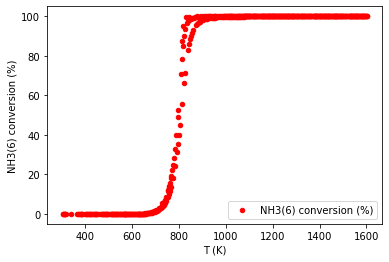

In [39]:
data_dict[commit].plot.scatter(x='T (K)',y='NH3(6) conversion (%)',label='NH3(6) conversion (%)',color="r")

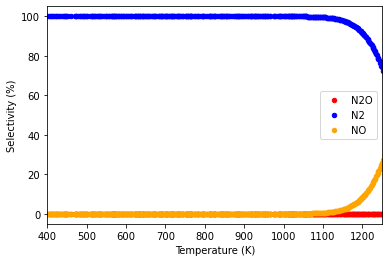

In [40]:
ax1 = data_dict[commit].plot.scatter(x='T (K)',y='N2O(7) Selectivity (%)',
                                     label='N2O',color='r')
ax2 = data_dict[commit].plot.scatter(x='T (K)',y='N2(4) Selectivity (%)',
                                     label='N2',color="blue", ax=ax1)
ax3 = data_dict[commit].plot.scatter(x='T (K)',y='NO(5) Selectivity (%)',
                                     label='NO',color='orange', ax=ax1)
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Selectivity (%)")
ax1.set_xlim(400, 1250)
plt.show()

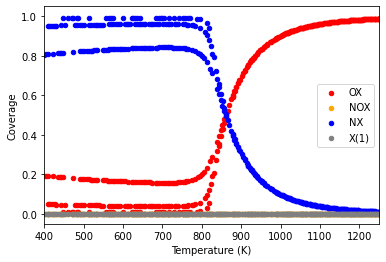

In [41]:
ax1 = data_dict[commit].plot.scatter(x='T (K)',y='OX(11) Coverage',
                                     label='OX',color="r")
ax2 = data_dict[commit].plot.scatter(x='T (K)',y='NOX(10) Coverage',
                                      label='NOX',color='orange', ax=ax1)
ax3 = data_dict[commit].plot.scatter(x='T (K)',y='NX(12) Coverage',
                                     label='NX',color='blue', ax=ax1)
ax4 = data_dict[commit].plot.scatter(x='T (K)',y='X Coverage',
                                      label='X(1)',color='gray', ax=ax1)
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Coverage")
ax1.set_xlim(400, 1250)
plt.show()

### Use this if run RMG on master

In [26]:
for commit in commit_list:
    for i in conversion_species:
        data_dict[commit]['NH3(6) conversion (%)'] = 100*(data_dict[commit]['X_nh3 initial'] - data_dict[commit][i])/data_dict[commit]['X_nh3 initial']
    
    for i in selectivity_species:
        data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])

    for i in coverage_species_1:
        data_dict[commit][f'{i} Coverage'] = (data_dict[commit][i])/(data_dict[commit]['OX(10)'] + data_dict[commit]['HOX(13)']+ data_dict[commit]['X(1)'])
    
    for i in coverage_species_2:
        data_dict[commit][f'{i} Coverage'] = (data_dict[commit][i])/(data_dict[commit]['NO_ads(27)'] + data_dict[commit]['N_ads(64)']+ data_dict[commit]['H3NX(29)']+ data_dict[commit]['X(1)'])
        

NameError: name 'conversion_species' is not defined

In [27]:
ax1 = data_dict[commit].plot(x='X_nh3 initial',y='OX(10) Coverage',
                                     label='O_X',color="orange")
ax2 = data_dict[commit].plot(x='X_nh3 initial',y='HOX(13) Coverage',
                                     label='OH_X',color='g', ax=ax1)
ax3 = data_dict[commit].plot(x='X_nh3 initial',y='X(1) Coverage',
                                     label='X',color='blue', ax=ax1)
ax1.set_xlabel("NH3(6) partial pressure (atm)")
ax1.set_ylabel("Coverage (%)")
plt.show()

KeyError: 'OX(10) Coverage'

In [28]:
ax1 = data_dict[commit].plot(x='X_nh3 initial',y='NO_ads(27) Coverage',
                                     label='NO_X',color="r")
ax2 = data_dict[commit].plot(x='X_nh3 initial',y='N_ads(72) Coverage',
                                     label='N_X',color='orange', ax=ax1)
ax3 = data_dict[commit].plot(x='X_nh3 initial',y='H3NX(29) Coverage',
                                     label='NH3_X',color='b', ax=ax1)
ax4 = data_dict[commit].plot(x='X_nh3 initial',y='X Coverage',
                                     label='X',color='g', ax=ax1)
ax1.set_xlabel("NH3(6) partial pressure (atm)")
ax1.set_ylabel("Coverage (%)")
plt.show()

KeyError: 'NO_ads(27) Coverage'